## Property dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
prop = pd.read_csv("properties_2025_05_20_1747761296 (1).csv")
len(prop)

4137

## Data Cleaning

In [3]:
# drop the unnecessary columns
prop.drop(columns=["Host Email", "Host Name", "Address"], inplace=True)

### Remove the test listing

In [4]:
# remove the rows with 'test' and 'demo' in the property title
prop_new = prop[~prop['Property Title'].str.contains('test', case=False, na=False)]
prop_new = prop_new[~prop_new['Property Title'].str.contains('demo', case=False, na=False)]

In [5]:
len(prop_new)

4045

In [6]:
# nine completely empty rows
print(prop_new["Number Of People"].isna().sum())
print(prop_new["Number Of Pets"].isna().sum())
print(prop_new["Property Size"].isna().sum())
print(prop_new["Space Type"].isna().sum())
print(prop_new["Host Prefers"].isna().sum())
print(prop_new["Occupants"].isna().sum())
print(prop_new["Furnishing Level"].isna().sum())
print(prop_new["Shared Spaces"].isna().sum())
print(prop_new["Bathroom Type"].isna().sum())

4045
4045
4045
4045
4045
4045
4045
4045
4045


- May get information of properties from the description later using language processing model

### Format the province

In [7]:
print(prop_new["City"].isna().sum())
print(prop_new["Province"].isna().sum())

760
760


In [8]:
# all the unique value in the province column
prop_new["Province"].unique()

array(['British Columbia', nan, 'BC', 'Alberta', 'Ontario',
       'Saskatchewan', 'Manitoba', 'AB', 'Quebec',
       'Newfoundland and Labrador', 'Ont', 'Québec', 'New Brunswick',
       'NS', 'ON', 'Ab', 'On', 'Bc', 'TX', 'B.C', 'bc', 'ab', 'MB',
       'Nova Scotia', 'QC', 'NB', 'NU', 'PE', 'SK'], dtype=object)

In [9]:
# set up province dictionary
province_dict = {
    'Alberta': 'AB',
    'British Columbia': 'BC',
    'Manitoba': 'MB',
    'New Brunswick': 'NB',
    'Newfoundland and Labrador': 'NL',
    'Nova Scotia': 'NS',
    'Ontario': 'ON',
    'Prince Edward Island': 'PE',
    'Quebec': 'QC',
    'Québec': 'QC',
    'Saskatchewan': 'SK',
    'Northwest Territories': 'NT',
    'Nunavut': 'NU',
    'Yukon': 'YT'
}

In [10]:
# replace the full province name with abbreviation
prop_new.loc[:, "Province"] = prop_new["Province"].replace(province_dict)

In [11]:
# deal with special values of province
prop_new.loc[:, "Province"] = prop_new["Province"].replace("Ont", "ON")
prop_new.loc[:, "Province"] = prop_new["Province"].replace("B.C", "BC")

In [12]:
# convert all to uppercase
prop_new.loc[:, "Province"] = prop_new["Province"].str.upper()

In [13]:
# double check the province
prop_new["Province"].unique()

array(['BC', nan, 'AB', 'ON', 'SK', 'MB', 'QC', 'NL', 'NB', 'NS', 'TX',
       'NU', 'PE'], dtype=object)

### Format postal code

In [14]:
print(prop_new["Postal Code"].isna().sum())

760


In [15]:
# remove the existing white space
mask = prop_new['Postal Code'].notna()
prop_new.loc[mask, 'Postal Code'] = prop_new.loc[mask, 'Postal Code'].str.replace(r'\s+', '', regex=True)

# convert all to upper case letter
prop_new.loc[:, "Postal Code"] = prop_new["Postal Code"].str.upper()

In [16]:
# check the postal code that are not 6 character long
non_null = prop_new["Postal Code"].notna()
invalid_length = prop_new[non_null]["Postal Code"].astype(str).str.len() != 6
prop_new[non_null][invalid_length]

,ID,Property Title,Description,City,Province,Postal Code,Number Of People,Number Of Pets,Bathroom Occupants,Price,...,Household Items,Occupants,Furnishing Level,Furnishings,Bed Type,Safety Features,Amenities,House Rules,Shared Spaces,Bathroom Type
17,19,Shack on a garbage heap,NaN,Kelowna,BC,V8;IJIOU09U90,NaN,NaN,1,4.0,...,Dish Detergent,NaN,NaN,"Closet, Drawers",NaN,Smoke Detector,"wifi, Cable / Satellite, Iron",NaN,NaN,NaN
84,86,ij;ioj;io;oh,NaN,Kelowna,BC,FFEECEE,NaN,NaN,1,763.0,...,Pantry Items,NaN,NaN,"Blankets, Desk",NaN,Smoke Detector,Street parking,No shoes inside,NaN,NaN
86,88,;j;oij08u08u9[,NaN,Kelowna,BC,78YHIUIU,NaN,NaN,1,7918.0,...,"Pantry Items, Condiments",NaN,NaN,NaN,Twin bed,Smoke Detector,"Washer, Dryer, Cable / Satellite",No smoking,NaN,NaN
133,135,Very Large furnished Private Room with share a...,NaN,Prince George,BC,V2M4|M5,NaN,NaN,1,572.0,...,"Pantry Items, Condiments",NaN,NaN,"Bedding, Blankets, Towels, Pillows, Desk, Hang...",Queen bed,"Fire Extinguisher, Smoke Detector, Carbon Mono...","Street parking, Stove and oven, Fridge, Microw...","Quiet hours, Keep spaces clean, Policy on visi...",NaN,NaN
217,220,Best room in kelowna,Best room in kelowna Details,Calgary,AB,10001,NaN,NaN,1,880.0,...,Pantry Items,NaN,NaN,Television,NaN,Security alarm,Free parking on site,NaN,NaN,NaN
449,454,Clean master bedroom with closet,NaN,Abbotsford,BC,V2T6M46M4,NaN,NaN,1,462.0,...,"Condiments, Laundry Detergent, Dish Detergent,...",NaN,NaN,"Bedding, Blankets, Towels, Pillows, Hangers, C...",Queen bed,"Smoke Detector, Carbon Monoxide Detector, Firs...","Street parking, Stove and oven, Fridge, Dishwa...","No smoking, Quiet hours, No shoes inside, Keep...",NaN,NaN
513,519,#12,NaN,West Kelowna,BC,11011,NaN,NaN,1,440.0,...,NaN,NaN,NaN,Bedding,NaN,Fire Extinguisher,"Free parking on site, Kitchenware",NaN,NaN,NaN
525,531,Clean private room,5 minutes walk to 29 skytrain station. 3 stops...,Vancouver,BC,V5R,NaN,NaN,1,616.0,...,NaN,NaN,NaN,"Bedding, Blankets, Pillows, Hangers, Drawers, ...",Single bed,"Fire Extinguisher, Smoke Detector, First aid k...","Street parking, Stove and oven, Fridge, Microw...","No smoking, Quiet hours, Keep spaces clean, Po...",NaN,NaN
544,551,Large Furnished Room-45 seconds from Canada Line,"Available August 1, 2020\n\nThis is one bedroo...",Vancouver,BC,V5Z-2X6,NaN,NaN,1,924.0,...,"Pantry Items, Condiments, Laundry Detergent, D...",NaN,NaN,"Bedding, Blankets, Towels, Pillows, Hangers, C...",Queen bed,Smoke Detector,"Street parking, Stove and oven, Fridge, Dishwa...","No smoking, Keep spaces clean, Notice on visitors",NaN,NaN
576,584,A small room with a window facing the backyard...,I live in a regular sized house with a big bac...,Edmonton,AB,T6L-5M4,NaN,NaN,1,704.0,...,"Condiments, Dish Detergent, Toilet Paper",NaN,NaN,"Hangers, Closet",NaN,"Smoke Detector, First aid kit","Street parking, Stove and oven, Fridge, Dishwa...","No smoking, No alcohol, No shoes inside, Keep ...",NaN,NaN


In [17]:
# remove the dash in the middle
prop_new.loc[mask, 'Postal Code'] = prop_new['Postal Code'].str.replace('-', '', regex=False)

In [18]:
# add white space in the middle
mask_6 = prop_new['Postal Code'].str.len() == 6
first_part = prop_new.loc[mask, 'Postal Code'].str[:3]
second_part = prop_new.loc[mask, 'Postal Code'].str[3:]
prop_new.loc[mask, 'Postal Code'] = first_part + ' ' + second_part

### Split the columns with multiple value

In [19]:
# convert the string with multiple values into a list
prop_new.loc[:, "Facilities"] = prop_new["Facilities"].str.split(",")
prop_new.loc[:, "Household Items"] = prop_new["Household Items"].str.split(",")
prop_new.loc[:, "Furnishings"] = prop_new["Furnishings"].str.split(",")
prop_new.loc[:, "Safety Features"] = prop_new["Safety Features"].str.split(",")
prop_new.loc[:, "Amenities"] = prop_new["Amenities"].str.split(",")
prop_new.loc[:, "House Rules"] = prop_new["House Rules"].str.split(",")

In [20]:
# convert the string with multiple values into a list (remove white spaces)
prop_new.loc[:, "Facilities"] = prop_new["Facilities"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
prop_new.loc[:, "Household Items"] = prop_new["Household Items"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
prop_new.loc[:, "Furnishings"] = prop_new["Furnishings"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
prop_new.loc[:, "Safety Features"] = prop_new["Safety Features"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
prop_new.loc[:, "Amenities"] = prop_new["Amenities"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)
prop_new.loc[:, "House Rules"] = prop_new["House Rules"].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)

In [21]:
#prop_new.head()

- for better EDA, expload the columns with multiple values

In [22]:
# copy the dataset with amenities and province
df_amenities = prop_new[['Province', 'Amenities']].copy()

In [23]:
# explode the columns with multiple values
facilities_e = prop_new[['Facilities']].explode('Facilities')
household_e = prop_new[['Household Items']].explode('Household Items')
furnish_e = prop_new[['Furnishings']].explode('Furnishings')
safety_e = prop_new[['Safety Features']].explode('Safety Features')
amenities_e = df_amenities.explode('Amenities')
houserule_e = prop_new[['House Rules']].explode('House Rules')

- for further modelling, may need to convert these nultiple values into binary structure

### Clean city name

In [24]:
# import the city dataset for matching city name
city_df = pd.read_csv("canadacities.csv")
city_list = city_df["city"]
city_list = ['West Kelowna' if city == 'Westbank' else city for city in city_list]
city_list.extend(["Langley Township", "Revelstoke", "Lower Sackville", "Middle Sackville", "Upper Sackville", "Okanagan Falls", "Lower Truro", "Greater Sudbury", "Stayner", "Windsor Junction"])
city_list = [c.lower() for c in city_list]

In [25]:
# define city matching function
def match_city(city, city_list):
    if not isinstance(city, str):
        return city  # skip NaN or non-string

    city_lower = city.lower()
    
    # Find the first valid city name that appears in the raw string
    for valid in sorted(city_list, key=len, reverse=True):
        if valid in city_lower:
            return valid.title()  # return formatted match 
    
    return city  # if no match, keep original

In [26]:
prop_new['City_clean'] = prop_new['City'].apply(lambda x: match_city(x, city_list))

In [27]:
unmatched_rows = prop_new[prop_new['City'] != prop_new['City_clean']]
unmatch_df = unmatched_rows.dropna(subset=['City'])
unmatch_df.drop(columns=["Number Of People", "Number Of Pets", "Property Size", "Space Type", "Host Prefers", "Occupants", "Furnishing Level", "Shared Spaces", "Bathroom Type"], inplace=True)
#unmatch_df.to_csv('unmatch.csv', index=False)

C:\Users\18209\AppData\Local\Temp\ipykernel_15340\2897059269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatch_df.drop(columns=["Number Of People", "Number Of Pets", "Property Size", "Space Type", "Host Prefers", "Occupants", "Furnishing Level", "Shared Spaces", "Bathroom Type"], inplace=True)


In [28]:
#prop_new.to_csv('properties_clean_list.csv', index=False)

## Premiliary EDA

### Categorical value

In [29]:
# province distribution
count_province = prop_new['Province'].value_counts()
print(count_province)

Province
BC    1764
NS     631
ON     565
AB     278
NB      21
QC      10
MB       6
SK       5
NU       2
NL       1
TX       1
PE       1
Name: count, dtype: int64


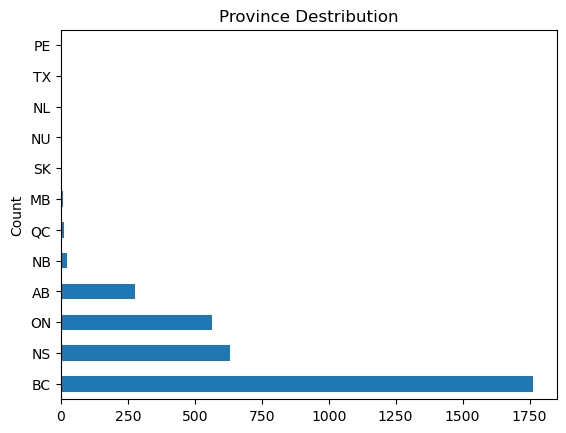

In [30]:
import matplotlib.pyplot as plt

# plot province distribution
count_province.plot(kind='barh')
plt.title("Province Destribution")
plt.ylabel("Count")
plt.show()

Property Type
House          1981
Other           760
Apartment       554
Townhouse       499
Suite           206
Mobile Home      45
Name: count, dtype: int64


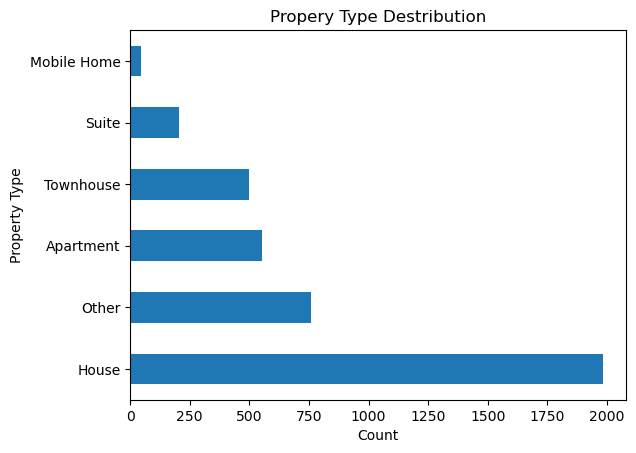

In [31]:
# distribution of property types
count_type = prop_new['Property Type'].value_counts()
print(count_type)

count_type.plot(kind='barh')
plt.title("Propery Type Destribution")
plt.xlabel("Count")
plt.show()

Facilities
Common lounge            637
Onsite management        507
Elevator                 358
Gym                      314
Storage locker           242
Swimming pool            216
Wheelchair accessible    206
Shared hot tub           206
Sauna                    100
Name: count, dtype: int64


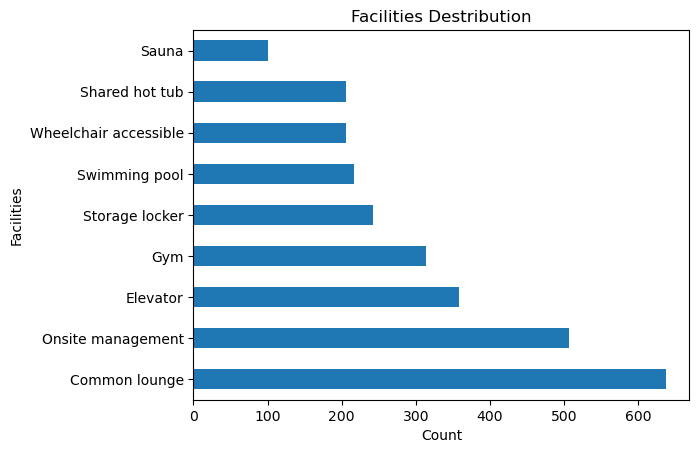

In [32]:
# distribution of facilities
count_facilities = facilities_e['Facilities'].value_counts()
print(count_facilities)

count_facilities.plot(kind='barh')
plt.title("Facilities Destribution")
plt.xlabel("Count")
plt.show()

Household Items
Dish Detergent       1674
Toilet Paper         1422
Condiments           1063
Laundry Detergent    1007
Pantry Items          999
Name: count, dtype: int64


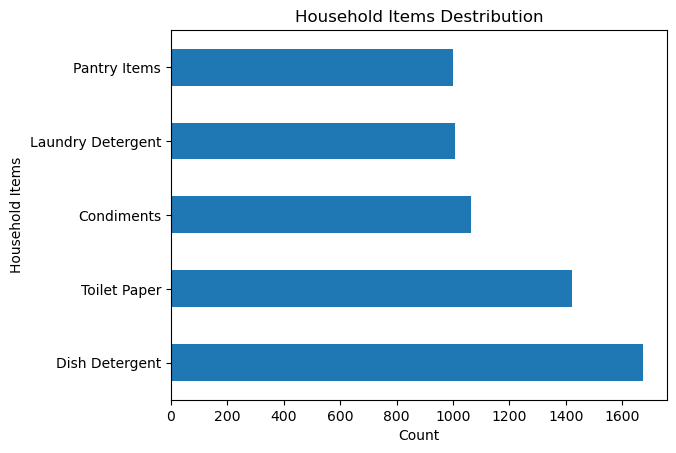

In [33]:
# distribution of household iems
count_household = household_e['Household Items'].value_counts()
print(count_household)

count_household.plot(kind='barh')
plt.title("Household Items Destribution")
plt.xlabel("Count")
plt.show()

Furnishings
Closet        2772
Bedding       2282
Pillows       2126
Blankets      2039
Drawers       1989
Hangers       1980
Towels        1780
Desk          1721
Lamp          1673
Television     965
Fridge         557
Name: count, dtype: int64


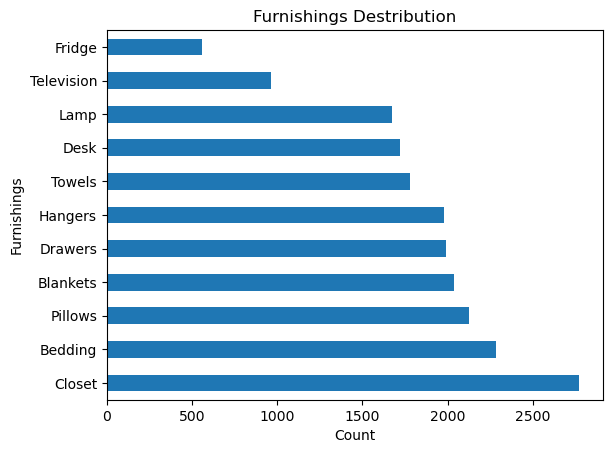

In [34]:
# distribution of furnishings
count_furnish = furnish_e['Furnishings'].value_counts()
print(count_furnish)

count_furnish.plot(kind='barh')
plt.title("Furnishings Destribution")
plt.xlabel("Count")
plt.show()

Safety Features
Smoke Detector              3102
Fire Extinguisher           2096
Carbon Monoxide Detector    2052
Door lock                   1544
First aid kit               1328
Security alarm               635
Name: count, dtype: int64


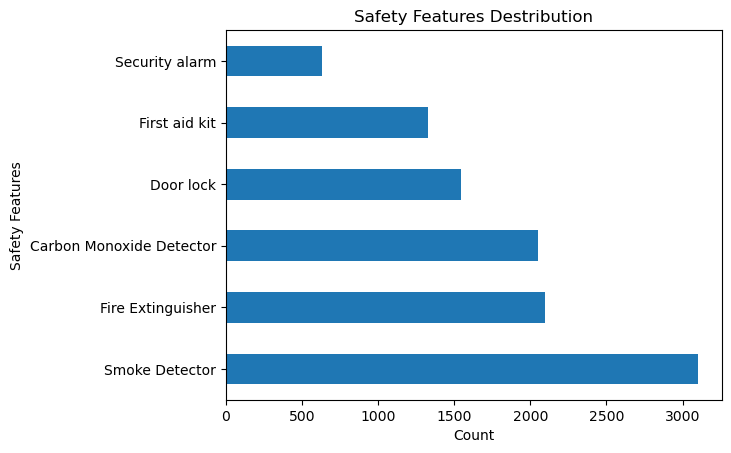

In [35]:
# distribution of safety features
count_safety = safety_e['Safety Features'].value_counts()
print(count_safety)

count_safety.plot(kind='barh')
plt.title("Safety Features Destribution")
plt.xlabel("Count")
plt.show()

Amenities
Fridge                  3167
Stove and oven          2975
wifi                    2966
Washer                  2961
Dryer                   2961
Microwave               2913
Kitchenware             2699
Window covering         2452
Dishwasher              2199
Free parking on site    2127
Air conditioner         1948
Tv                      1916
Street parking          1772
Fenced yard             1385
Blow dryer              1316
Iron                    1308
Cable / Satellite       1101
Private entry           1044
Fireplace               1004
Swimming pool            205
Name: count, dtype: int64


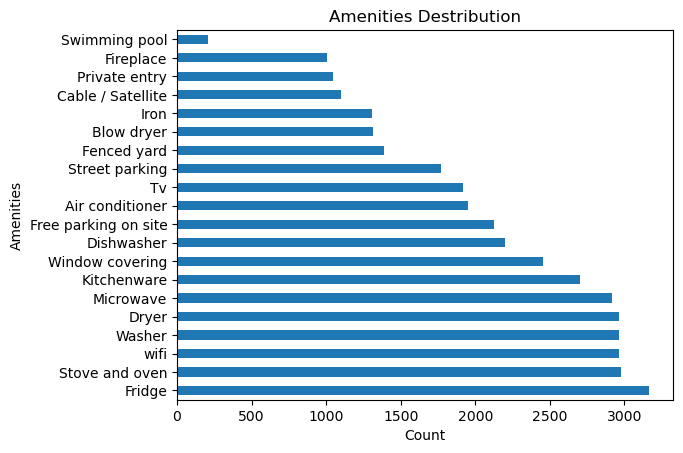

In [36]:
# distribution of amenities
count_amenities = amenities_e['Amenities'].value_counts()
print(count_amenities)

count_amenities.plot(kind='barh')
plt.title("Amenities Destribution")
plt.xlabel("Count")
plt.show()

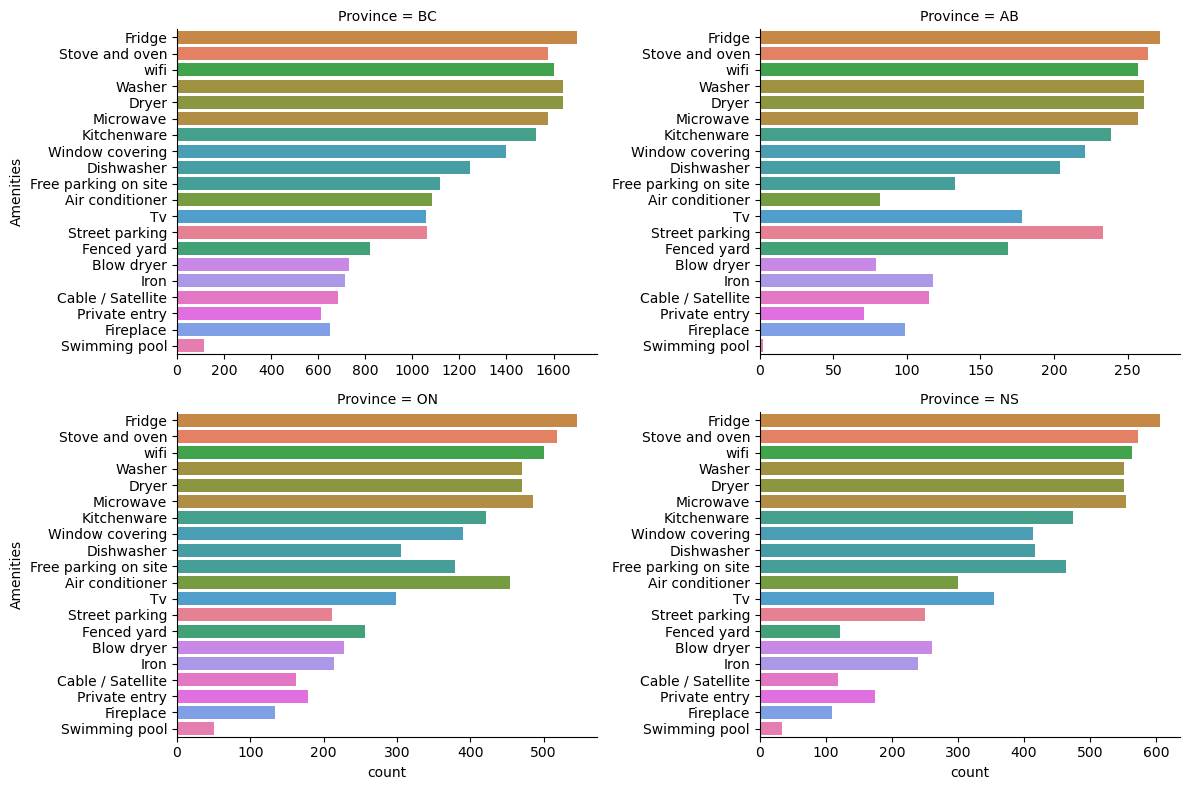

In [37]:
import seaborn as sns

amenities_e = amenities_e.reset_index(drop=True)
amenities_province = amenities_e[amenities_e['Province'].isin(['BC', 'ON', 'NS', 'AB'])]
amenity_order = (
    amenities_e['Amenities']
    .value_counts()
    .index
    .tolist()
)

# distribution of amenities in each province
sns.catplot(
    data=amenities_province,
    y='Amenities',
    kind='count',
    col='Province',
    col_wrap=2,
    sharex=False,
    sharey=False,
    height=4,
    aspect=1.5,
    hue='Amenities',
    order=amenity_order
)

#plt.suptitle('Distribution of Furnishings in Each Province')
plt.show()

House Rules
No smoking                  2824
Keep spaces clean           2443
Policy on visitor's stay    2013
Quiet hours                 1928
Notice on visitors          1848
No shoes inside             1837
No alcohol                   858
Scent free                   652
Name: count, dtype: int64


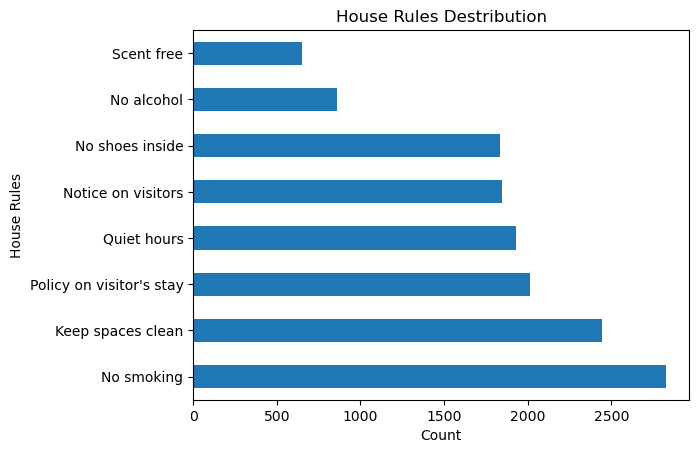

In [38]:
# distribution of amenities
count_houserule = houserule_e['House Rules'].value_counts()
print(count_houserule)

count_houserule.plot(kind='barh')
plt.title("House Rules Destribution")
plt.xlabel("Count")
plt.show()

### Numerial variable

In [39]:
# statistical summary of the total rental price
print(prop_new['Total'].describe())

count      3666.000000
mean       1098.124326
std        2091.288179
min           0.000000
25%         756.000000
50%         947.040000
75%        1188.000000
max      118800.000000
Name: Total, dtype: float64


- definitly have outliers

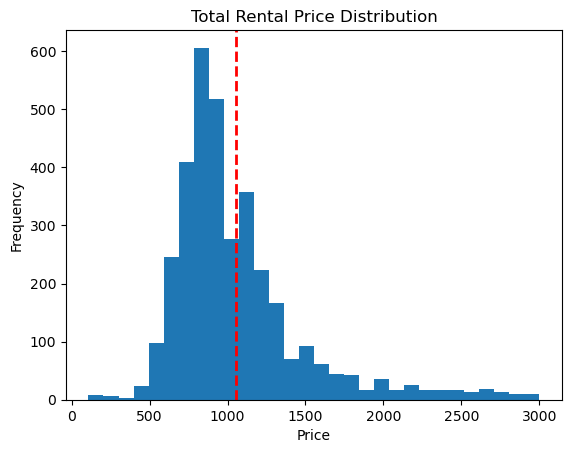

In [40]:
# distribution of the total rental price
filter_total = prop_new[(prop_new['Total'] >= 100) & (prop_new['Total'] <= 3000)] # filter out potential outliers

filter_total['Total'].plot(kind='hist', bins=30)
plt.title('Total Rental Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

mean_price = filter_total['Total'].mean()
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2)

plt.show()

In [41]:
# statistical summary of the basic rental price (without uilities fees)
print(prop_new['Price'].describe())

count      3543.000000
mean        993.739043
std        1754.901621
min           0.000000
25%         695.000000
50%         850.000000
75%        1050.000000
max      100000.000000
Name: Price, dtype: float64


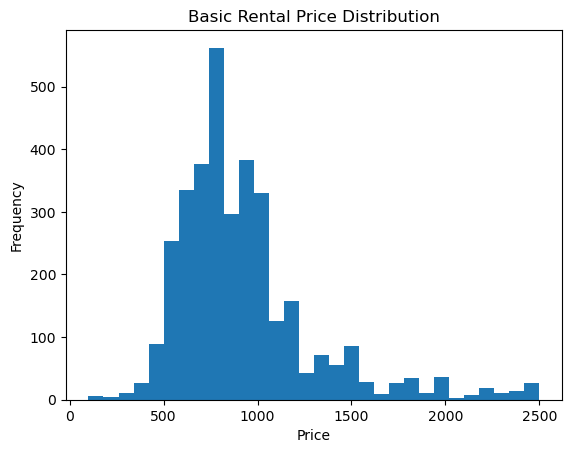

In [42]:
# distribution of the basic rental price
filter_price = prop_new[(prop_new['Price'] >= 100) & (prop_new['Price'] <= 2500)] # filter out potential outliers

filter_price['Price'].plot(kind='hist', bins=30)
plt.title('Basic Rental Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Cross variable plots

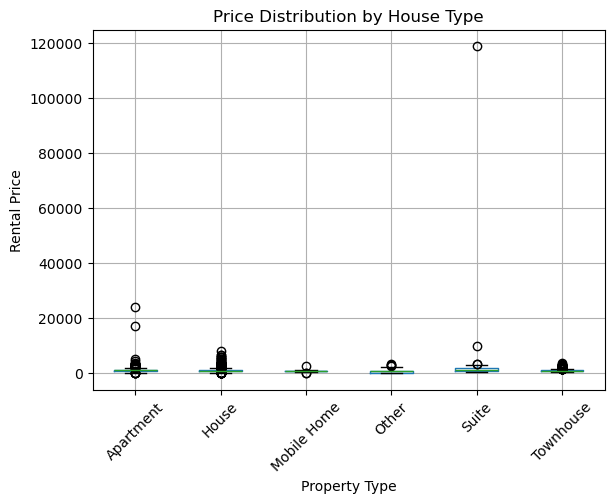

In [43]:
# property type vs. rental price
prop_new.boxplot(column='Total', by='Property Type', rot=45)
plt.title('Price Distribution by House Type')
plt.suptitle('')  # Remove the default title
plt.xlabel('Property Type')
plt.ylabel('Rental Price')
plt.show()

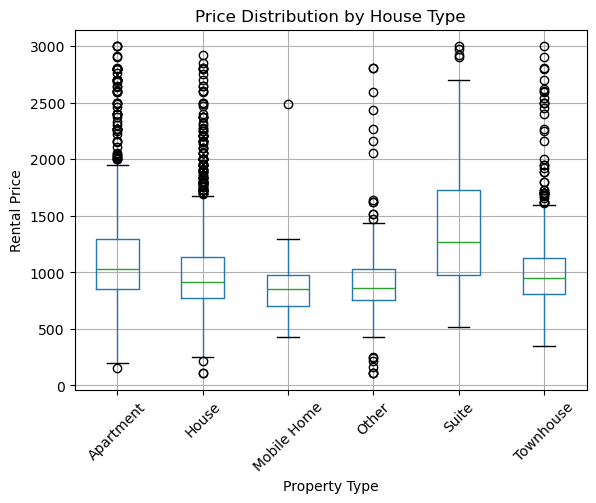

In [44]:
# filter the rental price
filter_total_box = prop_new[(prop_new['Total'] >= 100) & (prop_new['Total'] <= 3000)] # set the min and max price
filter_total_box.boxplot(column='Total', by='Property Type', rot=45)
plt.title('Price Distribution by House Type')
plt.suptitle('')  # Remove the default title
plt.xlabel('Property Type')
plt.ylabel('Rental Price')
plt.show()

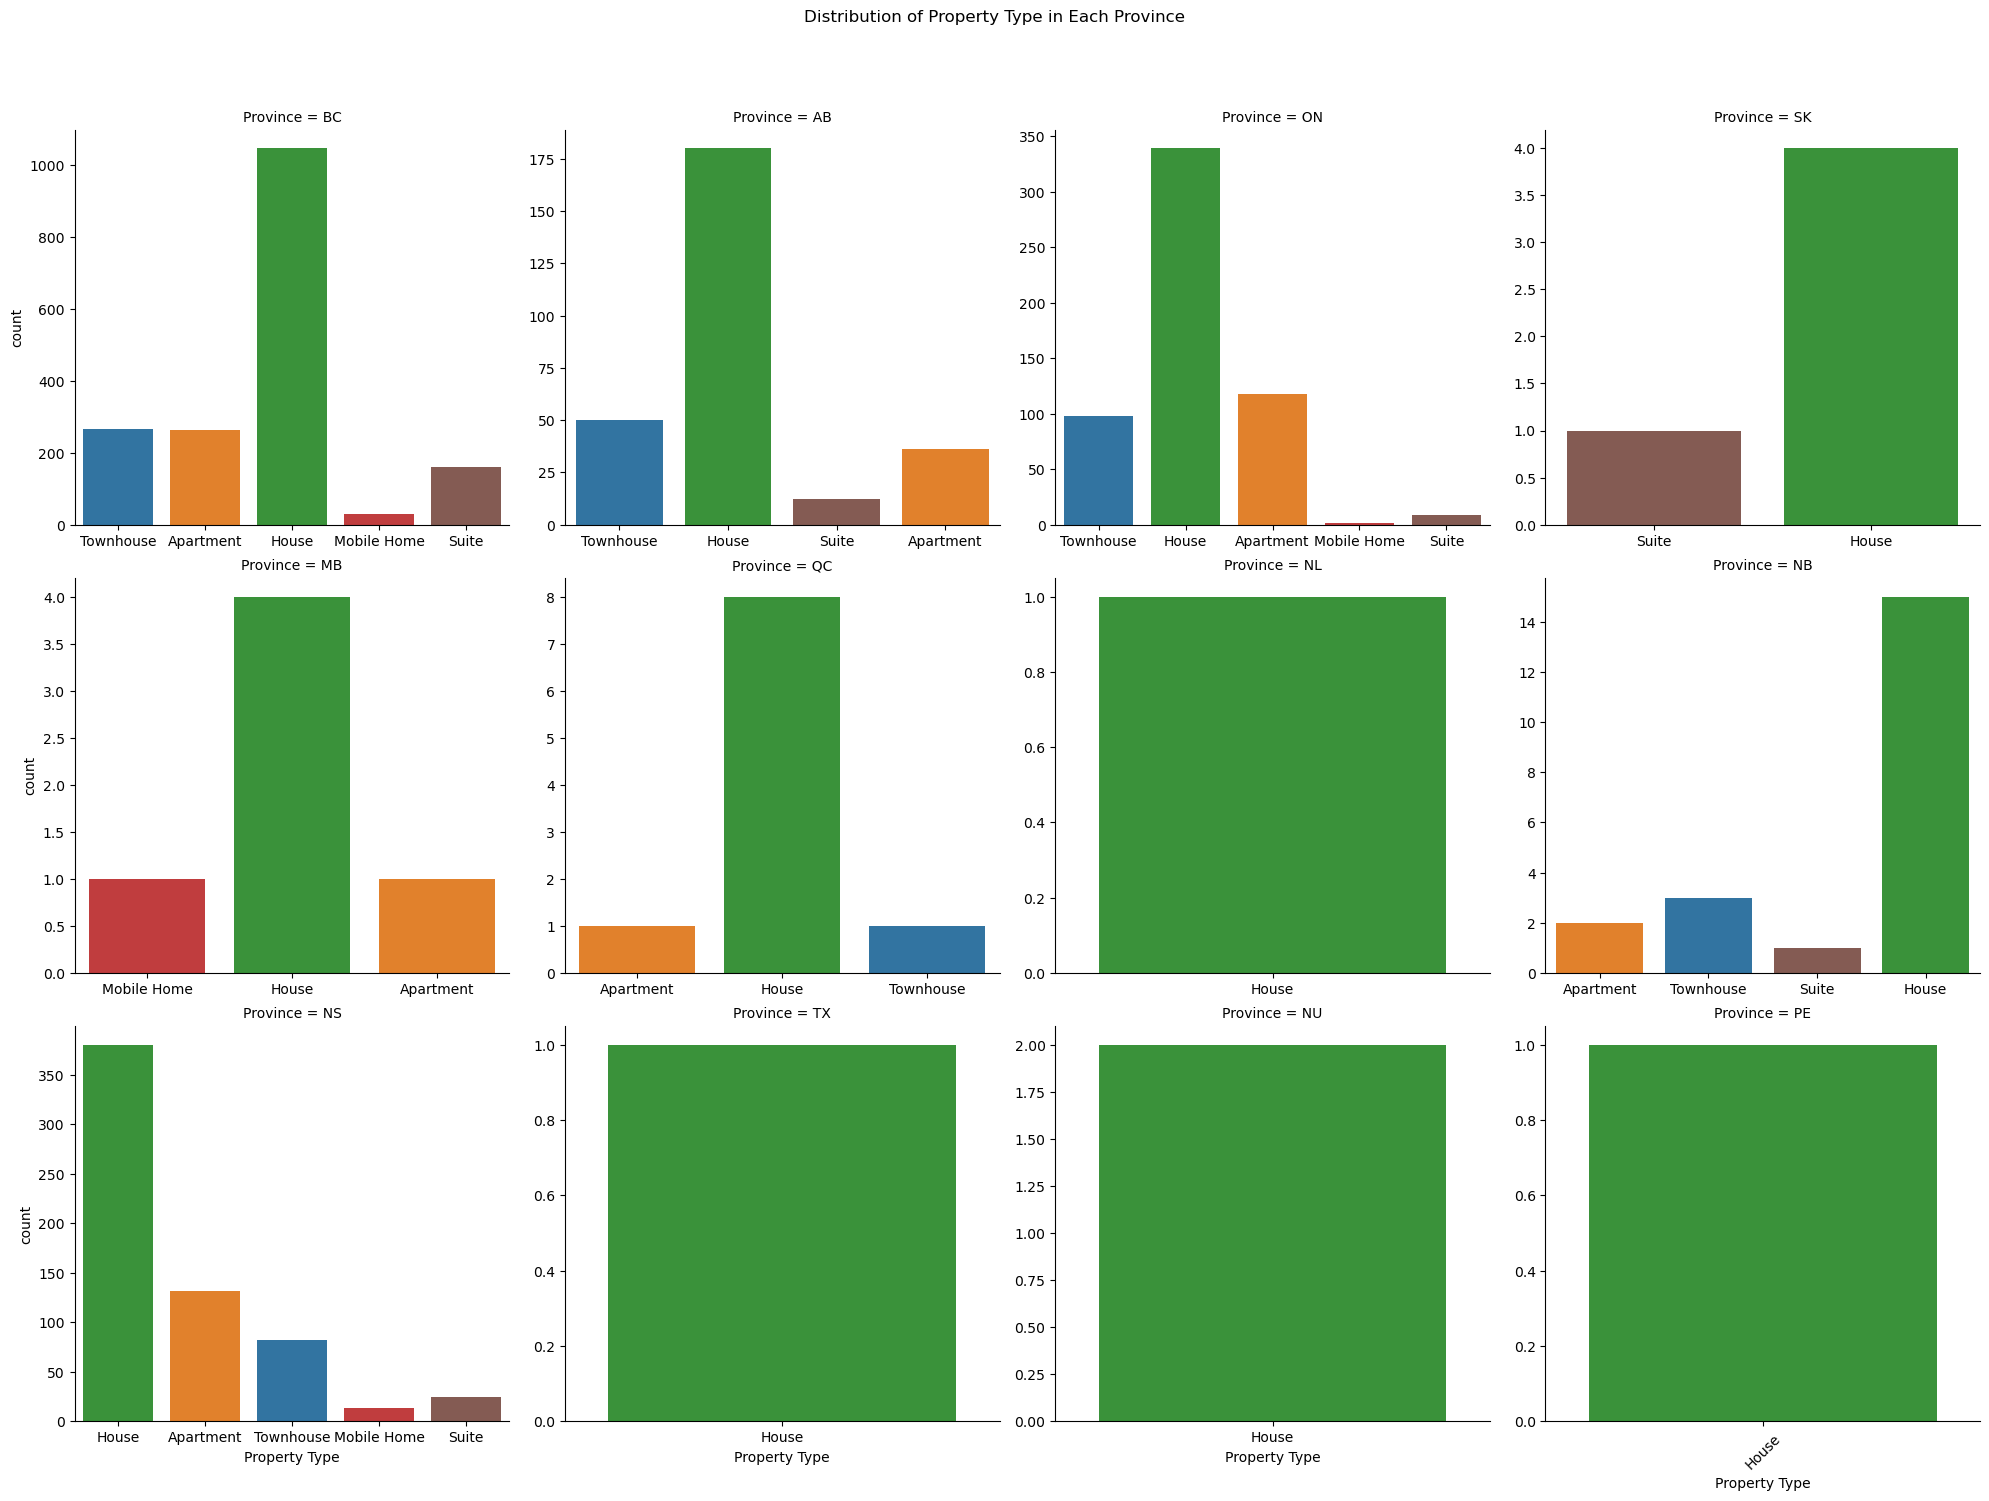

In [45]:
# property type vs. province
sns.catplot(
    data=prop_new,
    x='Property Type',
    kind='count',
    col='Province',
    hue='Property Type',
    col_wrap=4,             # Wrap after 4 columns
    sharex=False,
    sharey=False
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Property Type in Each Province')
plt.xticks(rotation=45)
plt.show()

## Modelling

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

# convert the columns with multiple value into binary structure
multi_cols = ['Facilities', 'Household Items', 'Furnishings', 'Safety Features', 'Amenities', 'House Rules']

# for storing transformed DataFrames
prop_bi = prop_new.copy()
binary_frames = []

# replace NaN with empty list
for col in multi_cols:
    prop_bi[col] = prop_bi[col].apply(lambda x: x if isinstance(x, list) else [])

for col in multi_cols:
    mlb = MultiLabelBinarizer()
    binary = pd.DataFrame(mlb.fit_transform(prop_bi[col]),
                          columns=[f"{col}_{cls}" for cls in mlb.classes_],
                          index=prop_bi.index)
    binary_frames.append(binary)

# concatenate everything back
prop_bi = pd.concat([prop_bi.drop(columns=multi_cols)] + binary_frames, axis=1)

In [47]:
# drop the empty columns for modelling
prop_bi.drop(
    columns=["Number Of People", "Number Of Pets", "Property Size", "Space Type", "Host Prefers", "Occupants", "Furnishing Level", "Shared Spaces", "Bathroom Type"], inplace=True)

In [48]:
prop_bi.head()

,ID,Property Title,Description,City,Province,Postal Code,Bathroom Occupants,Price,Utilities Fees,Total,...,Amenities_Window covering,Amenities_wifi,House Rules_Keep spaces clean,House Rules_No alcohol,House Rules_No shoes inside,House Rules_No smoking,House Rules_Notice on visitors,House Rules_Policy on visitor's stay,House Rules_Quiet hours,House Rules_Scent free
0,1,Wonderful room with a dog in home,NaN,Kelowna,BC,V1Y 3H9,1,704.0,96.0,864.0,...,0,1,0,1,0,0,0,0,0,1
1,2,Room Availble on Killarney Rd,NaN,Kelowna,BC,V1X 5C6,1,616.0,84.0,756.0,...,1,1,1,0,1,1,0,0,0,0
2,3,Room Availble in Glenmore,NaN,Kelowna,BC,V1V 2C5,1,880.0,120.0,1080.0,...,1,1,1,1,1,1,1,1,1,0
4,5,"Clean room, 10min bus to UBCO",NaN,Kelowna,BC,V1X 2G1,1,528.0,72.0,648.0,...,0,0,0,0,0,0,0,0,0,0
6,7,Treefort in Jungle,NaN,Kelowna,BC,V1Y 9X3,1,752.0,103.0,923.4,...,0,0,1,1,0,1,0,0,0,0


In [49]:
# import the contracts dataset
contracts = pd.read_csv("rental_contracts_2025_05_20_1747761650.csv")
rented_ids = set(contracts['Property Id'])
len(rented_ids)

367

In [50]:
# create a column to show whether the property has been rented in the contracts history
prop_bi['rent_history'] = prop_bi['ID'].apply(lambda x: 1 if x in rented_ids else 0)

### Random Forest

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

# features
X = prop_bi.drop(columns=['ID', 'rent_history'])

# convert categorical variables
X = pd.get_dummies(X)

# target variable
y = prop_bi['rent_history']

In [52]:
# split into 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs, precisions, recalls, f1s = [], [], [], []
y_true_all = []
y_pred_all = []

# loop through the folders
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    accs.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    
    print(f"Fold {fold+1} — Accuracy: {accs[-1]:.3f}, F1: {f1s[-1]:.3f}")

# print average metrics
print(f"Mean Accuracy:  {np.mean(accs):.3f}")
print(f"Mean Precision: {np.mean(precisions):.3f}")
print(f"Mean Recall:    {np.mean(recalls):.3f}")
print(f"Mean F1 Score:  {np.mean(f1s):.3f}")

Fold 1 — Accuracy: 0.921, F1: 0.179
Fold 2 — Accuracy: 0.926, F1: 0.062
Fold 3 — Accuracy: 0.925, F1: 0.141
Fold 4 — Accuracy: 0.906, F1: 0.136
Fold 5 — Accuracy: 0.921, F1: 0.179
Mean Accuracy:  0.920
Mean Precision: 0.902
Mean Recall:    0.077
Mean F1 Score:  0.140


In [53]:
# model output
cm = confusion_matrix(y_true_all, y_pred_all)
report = classification_report(y_true_all, y_pred_all)
print(cm)
print(report)

[[3693    4]
 [ 321   27]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3697
           1       0.87      0.08      0.14       348

    accuracy                           0.92      4045
   macro avg       0.90      0.54      0.55      4045
weighted avg       0.92      0.92      0.89      4045



- The properties that have been rented are less than 10% of the properties, which leads to the imbalanced between the two classes, so the model is biased toward predicting 0 and avoids predicting 1

## Extract dataset for Ollama processing

In [ ]:
ola = prop_new[['ID', 'Property Title', 'Description']].copy()
#ola.iloc[0:50].to_csv('nlp_text_1.csv', index=False)